In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [198]:
train_df = pd.read_csv("/kaggle/input/tabular-playground-series-jul-2021/train.csv")
test_df = pd.read_csv("/kaggle/input/tabular-playground-series-jul-2021/test.csv")

In [199]:
print(train_df.shape)
train_df

(7111, 12)


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [200]:
print(test_df.shape)
test_df

(2247, 9)


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


In [201]:
train_df["date_time"] = pd.to_datetime(train_df["date_time"])
test_df["date_time"] = pd.to_datetime(test_df["date_time"])

In [202]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_time               7111 non-null   datetime64[ns]
 1   deg_C                   7111 non-null   float64       
 2   relative_humidity       7111 non-null   float64       
 3   absolute_humidity       7111 non-null   float64       
 4   sensor_1                7111 non-null   float64       
 5   sensor_2                7111 non-null   float64       
 6   sensor_3                7111 non-null   float64       
 7   sensor_4                7111 non-null   float64       
 8   sensor_5                7111 non-null   float64       
 9   target_carbon_monoxide  7111 non-null   float64       
 10  target_benzene          7111 non-null   float64       
 11  target_nitrogen_oxides  7111 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 

In [209]:
df = pd.concat([train_df,test_df])
df["month"] = df["date_time"].dt.month
df['week'] = df['date_time'].dt.week
df["day"] = df["date_time"].dt.day
df["hour"] = df["date_time"].dt.hour
df['time'] = df['date_time'].dt.date - df['date_time'].dt.date.min()
df['time'] = df['time'].apply(lambda x : x.days)
df["dayofweek"] = df["date_time"].dt.dayofweek
df['dayofweek'] = df['dayofweek'].astype(object)
df["target_carbon_monoxide"] = np.log1p(df["target_carbon_monoxide"])
df["target_benzene"] = np.log1p(df["target_benzene"])
df["target_nitrogen_oxides"] = np.log1p(df["target_nitrogen_oxides"])
df = pd.get_dummies(df)
df.drop("date_time",inplace=True,axis=1)
df

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,...,day,hour,time,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,1.252763,2.564949,...,10,18,0,0,0,1,0,0,0,0
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,1.131402,2.388763,...,10,19,0,0,0,1,0,0,0,0
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,1.163151,2.322388,...,10,20,0,0,0,1,0,0,0,0
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,1.163151,2.370244,...,10,21,0,0,0,1,0,0,0,0
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,0.916291,2.001480,...,10,22,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,NaN,NaN,...,4,10,390,1,0,0,0,0,0,0
2243,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,NaN,NaN,...,4,11,390,1,0,0,0,0,0,0
2244,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,NaN,NaN,...,4,12,390,1,0,0,0,0,0,0
2245,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,NaN,NaN,...,4,13,390,1,0,0,0,0,0,0


In [210]:
df.dtypes

deg_C                     float64
relative_humidity         float64
absolute_humidity         float64
sensor_1                  float64
sensor_2                  float64
sensor_3                  float64
sensor_4                  float64
sensor_5                  float64
target_carbon_monoxide    float64
target_benzene            float64
target_nitrogen_oxides    float64
month                       int64
week                        int64
day                         int64
hour                        int64
time                        int64
dayofweek_0                 uint8
dayofweek_1                 uint8
dayofweek_2                 uint8
dayofweek_3                 uint8
dayofweek_4                 uint8
dayofweek_5                 uint8
dayofweek_6                 uint8
dtype: object

In [211]:
train_df = df[:7111]
test_df = df[7111:]

In [212]:
train_df

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,...,day,hour,time,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,1.252763,2.564949,...,10,18,0,0,0,1,0,0,0,0
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,1.131402,2.388763,...,10,19,0,0,0,1,0,0,0,0
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,1.163151,2.322388,...,10,20,0,0,0,1,0,0,0,0
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,1.163151,2.370244,...,10,21,0,0,0,1,0,0,0,0
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,0.916291,2.001480,...,10,22,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,0.832909,1.808289,...,31,20,296,0,0,0,0,1,0,0
7107,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,0.875469,1.916923,...,31,21,296,0,0,0,0,1,0,0
7108,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,0.955511,1.824549,...,31,22,296,0,0,0,0,1,0,0
7109,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,0.916291,1.722767,...,31,23,296,0,0,0,0,1,0,0


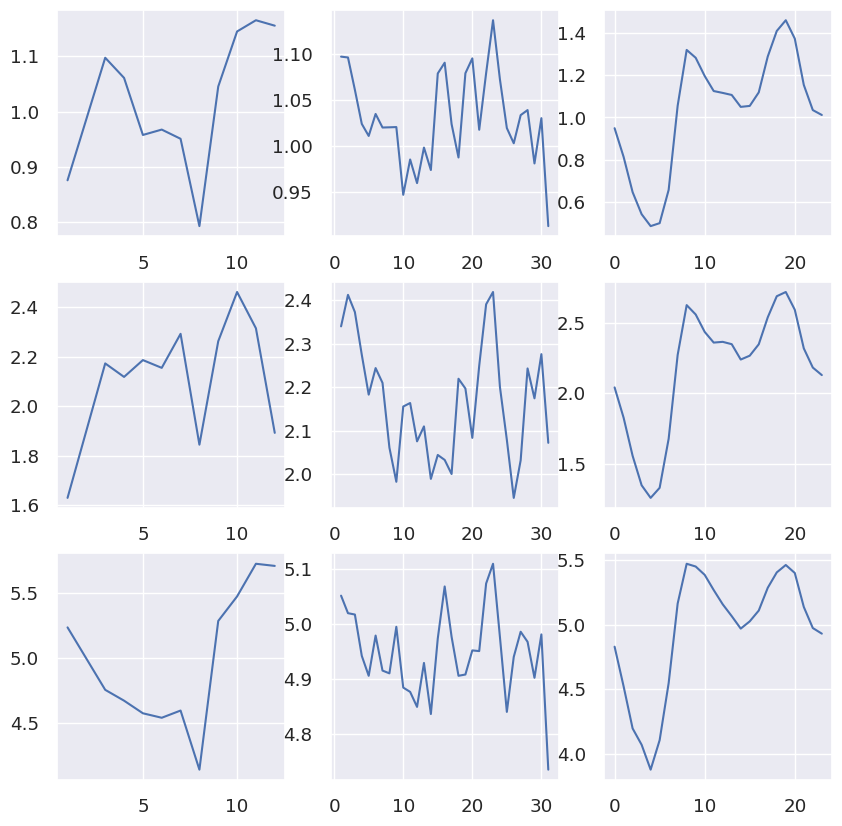

In [213]:
fig, ax = plt.subplots(3, 3, figsize = (10,10))
ax[0,0].plot(train_df.groupby(["month"]).agg({"target_carbon_monoxide":"mean"}))
ax[0,1].plot(train_df.groupby(["day"]).agg({"target_carbon_monoxide":"mean"}))
ax[0,2].plot(train_df.groupby(["hour"]).agg({"target_carbon_monoxide":"mean"}))

ax[1,0].plot(train_df.groupby(["month"]).agg({"target_benzene":"mean"}))
ax[1,1].plot(train_df.groupby(["day"]).agg({"target_benzene":"mean"}))
ax[1,2].plot(train_df.groupby(["hour"]).agg({"target_benzene":"mean"}))

ax[2,0].plot(train_df.groupby(["month"]).agg({"target_nitrogen_oxides":"mean"}))
ax[2,1].plot(train_df.groupby(["day"]).agg({"target_nitrogen_oxides":"mean"}))
ax[2,2].plot(train_df.groupby(["hour"]).agg({"target_nitrogen_oxides":"mean"}))

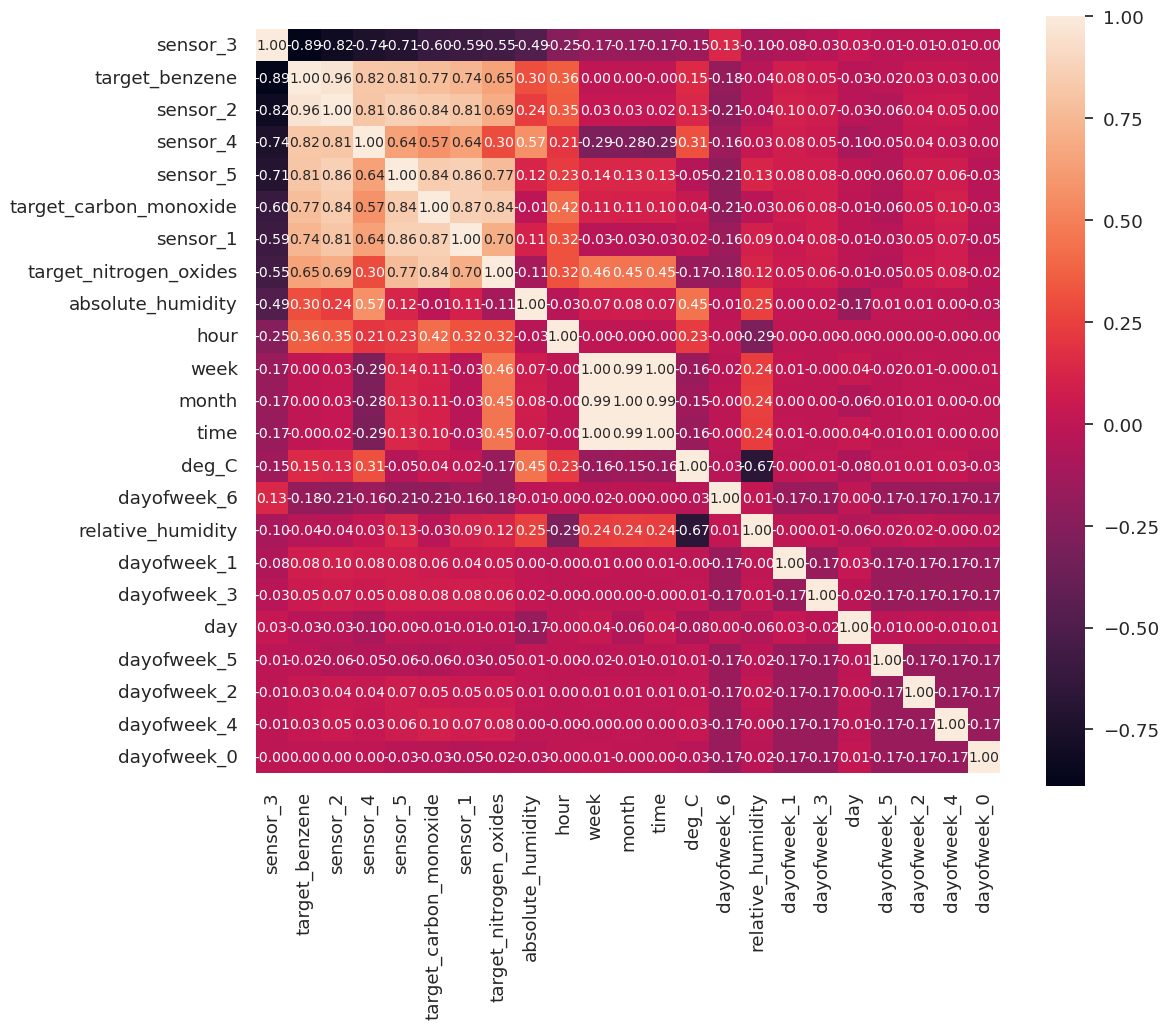

In [215]:
TARGET = "sensor_3"
k = 25
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [130]:
!pip install pycaret -q

ERROR: Cannot uninstall numpy 1.21.6, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.21.6'.


In [216]:
from pycaret.regression import setup, compare_models, blend_models, finalize_model, predict_model, plot_model

In [217]:
def pycaret_model(train, target, test, n_select, fold, opt):
  print('Setup Your Data....')
  setup(data=train,
              target=target,
              numeric_imputation = 'mean',
              silent= True)
  
  print('Comparing Models....')
  best = compare_models(sort=opt, n_select=n_select, fold = fold, exclude = ['xgboost'])

  print('Here is Best Model Feature Importances!')
  plot_model(estimator = best[0], plot = 'feature')
  time.sleep(5)
  
  print('Blending Models....')
  blended = blend_models(estimator_list= best, fold=fold, optimize=opt)
  pred_holdout = predict_model(blended)
    
  print('Finallizing Models....')
  final_model = finalize_model(blended)
  print('Done...!!!')

  pred_esb = predict_model(final_model, test)
  re = pred_esb['Label']

  return re

In [192]:
import time

In [220]:
train_df

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,week,day,hour,time,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,1.252763,2.564949,5.128122,3,10,10,18,0,0,0,1,0,0,0,0
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,1.131402,2.388763,4.604170,3,10,10,19,0,0,0,1,0,0,0,0
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,1.163151,2.322388,4.852811,3,10,10,20,0,0,0,1,0,0,0,0
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,1.163151,2.370244,5.182907,3,10,10,21,0,0,0,1,0,0,0,0
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,0.916291,2.001480,4.810557,3,10,10,22,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,0.832909,1.808289,5.258016,12,52,31,20,296,0,0,0,0,1,0,0
7107,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,0.875469,1.916923,5.404028,12,52,31,21,296,0,0,0,0,1,0,0
7108,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,0.955511,1.824549,5.431098,12,52,31,22,296,0,0,0,0,1,0,0
7109,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,0.916291,1.722767,5.302309,12,52,31,23,296,0,0,0,0,1,0,0


In [221]:
sub = pd.read_csv('../input/tabular-playground-series-jul-2021/sample_submission.csv')
sub['target_carbon_monoxide'] = np.exp(pycaret_model(train_df.drop(["target_benzene","target_nitrogen_oxides"],axis=1), 'target_carbon_monoxide', test_df.drop(["target_benzene","target_nitrogen_oxides"],axis=1), 5, 3, 'RMSLE'))-1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0748,0.0114,0.1069,0.9370,0.0554,0.0969
1,0.0760,0.0114,0.1069,0.9364,0.0540,0.0953
2,0.0751,0.0105,0.1025,0.9445,0.0521,0.0942
Mean,0.0753,0.0111,0.1054,0.9393,0.0538,0.0954
Std,0.0005,0.0004,0.0021,0.0037,0.0013,0.0011


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0705,0.0092,0.0959,0.9507,0.0483,0.0877


Finallizing Models....
Done...!!!


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0,0,0,0,0,0


In [222]:
sub["target_benzene"] = np.exp(pycaret_model(train_df.drop(["target_carbon_monoxide","target_nitrogen_oxides"],axis=1), 'target_benzene', test_df.drop(["target_carbon_monoxide","target_nitrogen_oxides"],axis=1), 5, 3, 'RMSLE'))-1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0686,0.0072,0.0848,0.9879,0.0289,0.0378
1,0.0739,0.0083,0.0913,0.9860,0.0308,0.0400
2,0.0715,0.0077,0.0879,0.9864,0.0306,0.0399
Mean,0.0713,0.0078,0.0880,0.9868,0.0301,0.0392
Std,0.0022,0.0005,0.0027,0.0008,0.0009,0.0010


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0708,0.0076,0.0871,0.9865,0.0299,0.0384


Finallizing Models....
Done...!!!


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0,0,0,0,0,0


In [223]:
sub["target_nitrogen_oxides"] = np.exp(pycaret_model(train_df.drop(["target_carbon_monoxide","target_benzene"],axis=1), 'target_nitrogen_oxides', test_df.drop(["target_carbon_monoxide","target_benzene"],axis=1), 5, 3, 'RMSLE'))-1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1517,0.0421,0.2053,0.9458,0.0388,0.0332
1,0.1550,0.0434,0.2084,0.9415,0.0378,0.0333
2,0.1501,0.0439,0.2096,0.9437,0.0404,0.0332
Mean,0.1523,0.0432,0.2078,0.9437,0.0390,0.0332
Std,0.0020,0.0008,0.0018,0.0018,0.0011,0.0001


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1472,0.0382,0.1954,0.9523,0.0360,0.0316


Finallizing Models....
Done...!!!


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0,0,0,0,0,0


In [224]:
sub.to_csv("/kaggle/working/d.csv",index=False)